In [28]:
rm(list=ls())
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("Seurat"))
library("doParallel")
library("alakazam")
library("shazam")
setwd("D:/Storage/Ali/10x/Year2/mergeBCR/data_v2")
subject = "P04"
path.data = file.path("D:","Storage","Ali","10x","Year2","mergeBCR","data")
BCR.data = read.table(paste0(path.data, "/", subject,"_p.tsv"), 
                     header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)

In [29]:
data = as.data.frame(BCR.data %>% 
        #rename(MU_FREQ = mu_freq) %>%
        rowwise() %>%
        mutate(cell_id_unique = ifelse(DATATYPE == "singleCell", 
                     paste(SAMPLE, strsplit(CELL, split = "-")[[1]][1], sep = "_"), NA))
        )             
dim(data)
# get non-single cell data
data.ns = filter(data, DATATYPE!="singleCell")
dim(data.ns)
# get single cell data
data.single = filter(data, DATATYPE=="singleCell")
# remove cells which have multipleble heavy chain
dim(data.single)
index.bar.dup = which(duplicated(data.single$cell_id_unique))
length(index.bar.dup)

[1] 313158     60

[1] 174403     60

[1] 138755     60

[1] 1211

In [30]:
BCR.data$CELL[1:10]
BCR.data$SAMPLE[1:10]
data.single$cell_id_unique[1:10]
length((data.single$cell_id_unique))
length(unique(data.single$cell_id_unique))
length(unique(data$CELL))

[1] "TCACGAATCTACGAGT-1" "GGGCACTAGTACGACG-1" "CGCTGGATCTCGGACG-1"
 [4] "TGCGTGGAGAAGCCCA-1" "CTTCTCTTCATCGGAT-1" "GATGCTAAGGACATTA-1"
 [7] NA                   NA                   "TAGGCATGTCTGATCA-1"
[10] "GTGTGCGCATAGAAAC-1"

[1] "P04_IgD-BCell_d0_1_Y2"  "P04_BMPC_d0_2_Y2"       "P04_PBMC-ASC_d5_1_Y1"  
 [4] "P04_PBMC-ASC_d7_1_Y2"   "P04_IgD-BCell_d12_1_Y1" "P04_IgD-BCell_d90_1_Y2"
 [7] "P04_BMPC_d0_Y1"         "P04_BMPC_d0_Y1"         "P04_IgD-BCell_d0_1_Y1" 
[10] "P04_PBMC-ASC_d5_1_Y1"

[1] "P04_IgD-BCell_d0_1_Y2_TCACGAATCTACGAGT" 
 [2] "P04_BMPC_d0_2_Y2_GGGCACTAGTACGACG"      
 [3] "P04_PBMC-ASC_d5_1_Y1_CGCTGGATCTCGGACG"  
 [4] "P04_PBMC-ASC_d7_1_Y2_TGCGTGGAGAAGCCCA"  
 [5] "P04_IgD-BCell_d12_1_Y1_CTTCTCTTCATCGGAT"
 [6] "P04_IgD-BCell_d90_1_Y2_GATGCTAAGGACATTA"
 [7] "P04_IgD-BCell_d0_1_Y1_TAGGCATGTCTGATCA" 
 [8] "P04_PBMC-ASC_d5_1_Y1_GTGTGCGCATAGAAAC"  
 [9] "P04_IgD-BCell_d90_1_Y2_CCGTACTGTGTAAGTA"
[10] "P04_IgD-BCell_d90_1_Y2_CTACCCAGTATAAACG"

[1] 138755

[1] 137544

[1] 122885

In [31]:
#  remove cells with multiple heavy chains
if(length(index.bar.dup)>0){
    bar.dup = unique(data.single$cell_id_unique[index.bar.dup])
    data.single = filter(data.single, !cell_id_unique %in% bar.dup) 
}
dim(data.single)
data.P04_PBMC_ASC_d5_1_Y1 = filter(data.single, SAMPLE == "P04_PBMC−ASC_d5_1_Y1")
data.P04_IgD_BCell_d14_1_Y2 = filter(data.single,SAMPLE == "P04_IgD−BCell_d14_1_Y2")
data.else = filter(data.single, (SAMPLE !="P04_PBMC−ASC_d5_1_Y1") & (SAMPLE !="P04_IgD−BCell_d14_1_Y2"))

dim(data.else)
dim(data.P04_PBMC_ASC_d5_1_Y1)
dim(data.P04_IgD_BCell_d14_1_Y2)

[1] 136350     60

[1] 119165     60

[1] 7041   60

[1] 10144    60

In [32]:
# find the number of cells having same seq and cell barcode 
#uniqueCell  <- singlecell_sharing_matrix(data.else, group="SAMPLE", cell="CELL", seq="SEQUENCE_IMGT")
# plot duplicated cells
#p = plotOverlapSingleCell( list_objOverlap=list(uniqueCell, uniqueCell), titleText="", 
#                order_by=sort(colnames(uniqueCell@overlap_count)), sizeCount=3, sizeDiag=2.5)
#pdf(paste0(subject,"_singleCelloverlap.pdf"),p, width=12,height=11)
#plot(p)
#dev.off()
source("OverlapHeatmap_singlecell.R")
dim(data.else)
# remove duplicated cells
data.else = removeSingleCellDuplicates(data.else, group="SAMPLE", cell="CELL", seq="SEQUENCE_IMGT")
dim(data.else)

[1] 119165     60

Remove duplicates - cycle  1 


[1] 116972     60

### check overlap between P04_PBMC−ASC_d5_1_Y1 and P04_IgD−BCell_d14_1_Y2

In [33]:
#cell.BCR.P04_PBMC_ASC_d5_1_Y1 = substr(BCR.P04_PBMC_ASC_d5_1_Y1$CELL, 1, 16) # remove the -1s
#cell.BCR.P04_IgD_BCell_d14_1_Y2 = substr(BCR.P04_IgD_BCell_d14_1_Y2$CELL, 1, 16) # remove the -1s
cell.BCR.P04_PBMC_ASC_d5_1_Y1 = data.P04_PBMC_ASC_d5_1_Y1$CELL
cell.BCR.P04_IgD_BCell_d14_1_Y2 = data.P04_IgD_BCell_d14_1_Y2$CELL
length(unique(intersect(cell.BCR.P04_PBMC_ASC_d5_1_Y1, cell.BCR.P04_IgD_BCell_d14_1_Y2)))
length(unique(intersect(data.P04_PBMC_ASC_d5_1_Y1$SEQUENCE_IMGT, data.P04_IgD_BCell_d14_1_Y2$SEQUENCE_IMGT)))

overlapped.cells = c()
for(i in 1:length(cell.BCR.P04_PBMC_ASC_d5_1_Y1)){
    for(j in 1:length(cell.BCR.P04_IgD_BCell_d14_1_Y2)){
        if(cell.BCR.P04_PBMC_ASC_d5_1_Y1[i] == cell.BCR.P04_IgD_BCell_d14_1_Y2[j]){
            if(data.P04_PBMC_ASC_d5_1_Y1$SEQUENCE_IMGT[i] == data.P04_IgD_BCell_d14_1_Y2$SEQUENCE_IMGT[j]){
                overlapped.cells = c(overlapped.cells, cell.BCR.P04_PBMC_ASC_d5_1_Y1[i])
            }
        }
    }
}
length(overlapped.cells)

[1] 1745

[1] 1302

[1] 1655

In [34]:
# Load mappings
path.data = file.path("C:","Project","workspace", "AliFlu","10x", "data")
mapping.file = file.path(path.data, "data_mapping", "map_GEX.txt")
mappings = read.delim(mapping.file, stringsAsFactors = FALSE, as.is=T)
sample = "P04_PBMC−ASC_d5_1_Y1"
samplePath = mappings$SamplePath[which(mappings$SampleName == sample)]
dir.name.full = paste0(path.data, samplePath,"/outs/filtered_feature_bc_matrix")
data <- Read10X(data.dir = dir.name.full)
obj <- CreateSeuratObject(counts = data, project = sample)
cell.GEX.P04_PBMC_ASC_d5_1_Y1 = Cells(obj)

sample = "P04_IgD−BCell_d14_1_Y2"
samplePath = mappings$SamplePath[which(mappings$SampleName == sample)]
dir.name.full = paste0(path.data, samplePath,"/outs/filtered_feature_bc_matrix")
data <- Read10X(data.dir = dir.name.full)
obj <- CreateSeuratObject(counts = data, project = sample)
cell.GEX.P04_IgD_BCell_d14_1_Y2 = Cells(obj)

### Barcode overlap between GEX and BCR data

BCR.P04_PBMC_ASC_d5_1_Y1 BCR.P04_IgD_BCell_d14_1_Y2
BCR.P04_PBMC_ASC_d5_1_Y1   7041                      1745                     
BCR.P04_IgD_BCell_d14_1_Y2 1745                     10144                     
GEX.P04_PBMC_ASC_d5_1_Y1   6696                      1827                     
GEX.P04_IgD_BCell_d14_1_Y2  107                      8331                     
                           GEX.P04_PBMC_ASC_d5_1_Y1 GEX.P04_IgD_BCell_d14_1_Y2
BCR.P04_PBMC_ASC_d5_1_Y1    6696                      107                     
BCR.P04_IgD_BCell_d14_1_Y2  1827                     8331                     
GEX.P04_PBMC_ASC_d5_1_Y1   15138                      206                     
GEX.P04_IgD_BCell_d14_1_Y2   206                    10535

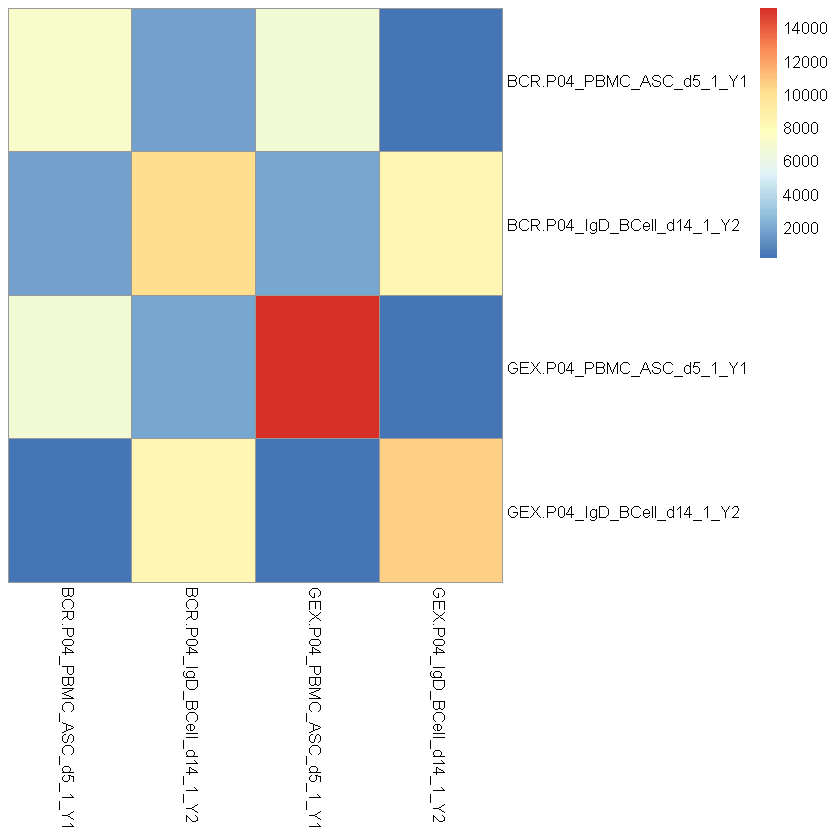

In [35]:
library("pheatmap")
samples= c("BCR.P04_PBMC_ASC_d5_1_Y1", "BCR.P04_IgD_BCell_d14_1_Y2",
          "GEX.P04_PBMC_ASC_d5_1_Y1","GEX.P04_IgD_BCell_d14_1_Y2")
cell.list = list(cell.BCR.P04_PBMC_ASC_d5_1_Y1,cell.BCR.P04_IgD_BCell_d14_1_Y2,
                cell.GEX.P04_PBMC_ASC_d5_1_Y1,cell.GEX.P04_IgD_BCell_d14_1_Y2)
overlap.matrix = matrix(nrow=length(samples), ncol=length(samples))
colnames(overlap.matrix) = samples
rownames(overlap.matrix) = samples
for(i in 1:length(samples)){
    for(j in 1:length(samples)){
            overlap.matrix[i,j] = length(intersect(cell.list[[i]], cell.list[[j]]))
        }
}
overlap.matrix
pheatmap(overlap.matrix, cluster_rows = FALSE, cluster_cols = FALSE)

In [36]:
# check overlap between 1000 duplicated BCR cells and cells between BCR and GEX
length(intersect(overlapped.cells, cell.GEX.P04_PBMC_ASC_d5_1_Y1))
length(intersect(overlapped.cells, cell.GEX.P04_IgD_BCell_d14_1_Y2))
# Is this the evidence that PBMC_ASC cells contaminated IgD- B cells?

[1] 1655

[1] 21

In [37]:
#1: P04_PBMC_ASC_d5_1_Y1 
#2: P04_IgD_BCell_d14_1_Y2
#A: overlap of BCR between P04_PBMC_ASC_d5_1_Y1 and P04_IgD_BCell_d14_1_Y2 = overlapped.cells
#B: BCR only in P04_PBMC_ASC_d5_1_Y1
#C: BCR only in P04_IgD_BCell_d14_1_Y2
length(overlapped.cells)
A1 = intersect(overlapped.cells, cell.GEX.P04_PBMC_ASC_d5_1_Y1)
A2 = intersect(overlapped.cells, cell.GEX.P04_IgD_BCell_d14_1_Y2)
A12 = intersect(overlapped.cells, intersect(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2))
A0 = which(!(overlapped.cells %in% c(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2)))
A1=A1[-which(A1 %in% A12)]
A2=A2[-which(A2 %in% A12)]
length(A1)
length(A2)
length(A12)
length(A0)

[1] 1655

[1] 1634

[1] 0

[1] 21

[1] 0

In [38]:
overlapped.cells[1]
cell.GEX.P04_PBMC_ASC_d5_1_Y1[1]

[1] "TCAGCAACAGGTCTCG-1"

[1] "AAACCTGAGAGACGAA-1"

In [39]:
B = cell.BCR.P04_PBMC_ASC_d5_1_Y1[which(!(cell.BCR.P04_PBMC_ASC_d5_1_Y1 %in% overlapped.cells))]
length(B)
B1 = intersect(B, cell.GEX.P04_PBMC_ASC_d5_1_Y1)
B2 = intersect(B, cell.GEX.P04_IgD_BCell_d14_1_Y2)
B12 = intersect(B, intersect(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2))
B0 = which(!(B %in% c(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2)))
B1=B1[-which(B1 %in% B12)]
B2=B2[-which(B2 %in% B12)]
length(B1)
length(B2)
length(B12)
length(B0)

[1] 5386

[1] 4959

[1] 4

[1] 82

[1] 341

In [40]:
C = cell.BCR.P04_IgD_BCell_d14_1_Y2[which(!(cell.BCR.P04_IgD_BCell_d14_1_Y2 %in% overlapped.cells))]
length(C)
C1 = intersect(C, cell.GEX.P04_PBMC_ASC_d5_1_Y1)
C2 = intersect(C, cell.GEX.P04_IgD_BCell_d14_1_Y2) 
C12 = intersect(C, intersect(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2))
C0 = which(!(C %in% c(cell.GEX.P04_PBMC_ASC_d5_1_Y1, cell.GEX.P04_IgD_BCell_d14_1_Y2)))
C1=C1[-which(C1 %in% C12)]
C2=C2[-which(C2 %in% C12)]
length(C1)
length(C2)
length(C12)
length(C0)

[1] 8489

[1] 30

[1] 8168

[1] 142

[1] 149

In [41]:
# Keep B and A1 for P04_PBMC_ASC_d5_1_Y1
# Keep C2 for P04_IgD_BCell_d14_1_Y2
dim(data.P04_PBMC_ASC_d5_1_Y1)
dim(data.P04_IgD_BCell_d14_1_Y2)
data.P04_PBMC_ASC_d5_1_Y1.s = filter(data.P04_PBMC_ASC_d5_1_Y1, CELL %in% c(B, A1))
data.P04_IgD_BCell_d14_1_Y2.s = filter(data.P04_IgD_BCell_d14_1_Y2, CELL %in% C2)
dim(data.P04_PBMC_ASC_d5_1_Y1.s)
dim(data.P04_IgD_BCell_d14_1_Y2.s)

[1] 7041   60

[1] 10144    60

[1] 7020   60

[1] 8168   60

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning me

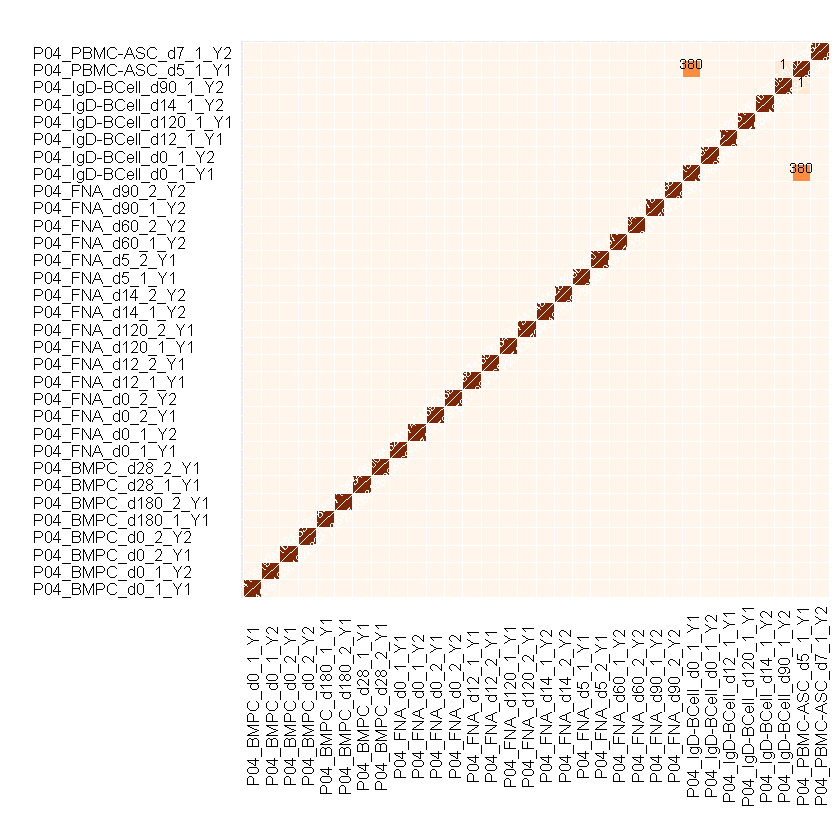

In [42]:
# Check overlap after removing duplicates
data.single.s = rbind(data.else, data.P04_PBMC_ASC_d5_1_Y1.s,data.P04_IgD_BCell_d14_1_Y2.s)
uniqueCell  <- singlecell_sharing_matrix(data.single.s, group="SAMPLE", cell="CELL", seq="SEQUENCE_IMGT")
p = plotOverlapSingleCell( list_objOverlap=list(uniqueCell, uniqueCell), titleText="", 
                           order_by=sort(colnames(uniqueCell@overlap_count)), 
                           sizeCount=3, sizeDiag=2.5)
plot(p)

In [43]:
dim(data.single.s)
data.single.s = removeSingleCellDuplicates(data.single.s, group="SAMPLE", cell="CELL", seq="SEQUENCE_IMGT")
dim(data.single.s)

[1] 132160     60

Remove duplicates - cycle  1 


[1] 131398     60

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning me

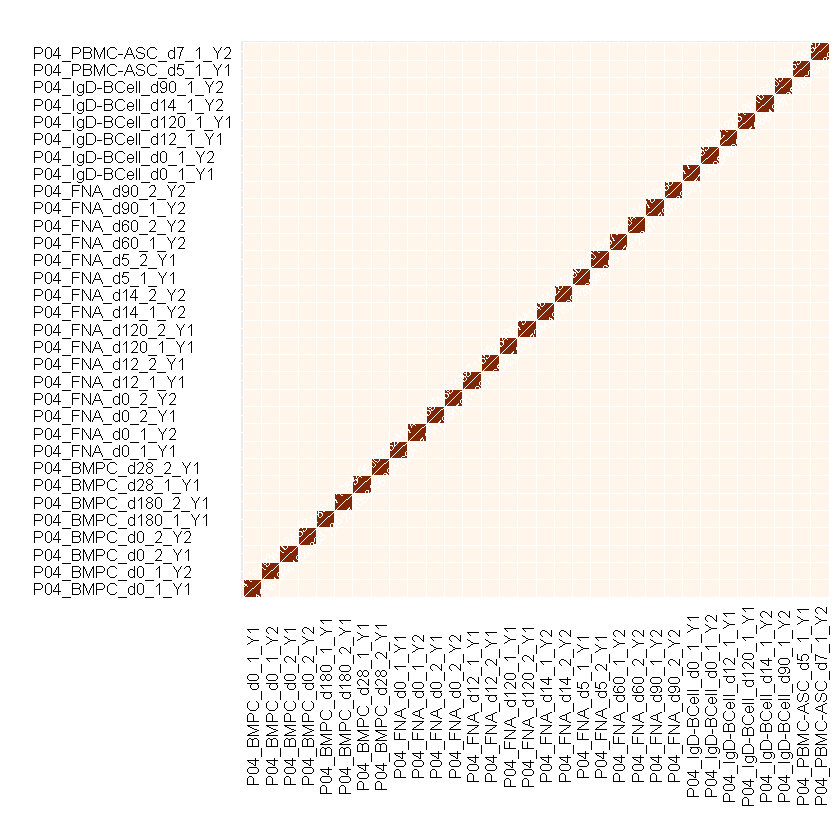

In [44]:
uniqueCell  <- singlecell_sharing_matrix(data.single.s, group="SAMPLE", cell="CELL", seq="SEQUENCE_IMGT")
p = plotOverlapSingleCell( list_objOverlap=list(uniqueCell, uniqueCell), titleText="", 
                           order_by=sort(colnames(uniqueCell@overlap_count)), 
                           sizeCount=3, sizeDiag=2.5)
plot(p)

In [45]:
data=rbind(data.ns, data.single.s)
dim(data)
write.table(data,file=paste0(subject,"_remDup.tsv"), quote=FALSE, sep="\t", row.names = FALSE)

[1] 305801     60